# Machine Learning for extracting meaningful information from unstructured text
**By Don Chidziwo C19135897Q**
**MSCDA Term Paper**
## 1 Problem
Businesses are constantly dealing with data, whether it comes from their employees, customers, or other external sources. Smart businesses are constantly looking for ways to use data to address their business problems and differentiate themselves in the market. But there are challenges that arise when it comes to leveraging this information. This is because of the nature of the data. Text classification is one of the most important tasks in Natural Language Processing. It is the process of classifying text strings or documents into different categories, depending upon the contents of the strings. Text classification has a variety of applications, such as detecting user sentiment from a tweet, classifying an email as spam or ham, classifying blog posts into different categories, automatic tagging of customer queries, and so on.

Schneider (2016) estimates that 80% data is unstructured. This necessitates the development of techniques for analysing unstructured data. One such technique is Natural Language Processing (NLP). However, because it is hard to understand and find meaning in data that is text-heavy, companies have a difficult time creating insights that could ultimately shape decisions that are made within a company. When expressing their sentiments towards a company's products, customers use various channels such as social media, leaving comments on the company's website and writing reviews of their encounter with a brand, service or product on a relevant website. Today, we live in a data age'. Due to rapid increase in the amount of user-generated data on social media and other sites, several opportunities and new open doors have been prompted for organizations that endeavour hard to keep a track on customer reviews and opinions about their products.

### 1.1 Aim
Against this background, the aim of this research is to explore ways and tools that can be used to preprocess text data so that it can be deciphered by machine learning algorithms.

### 1.2 Objective
* The objective of this project is to create a Machine Learning model that can be used to make classifications from text data alone
* The research will examine which Machine Learning model has the highest accuracy 

## 2 Literature Review
With the emergence of the social media, the high availability of the information on Internet and the users that have become prone to share on Internet its feelings about products, movies or wherever they want to share, for example in Twitter or Facebook where the people shares how they are feeling today or if its new car is good or not. The ability to process this information has become important because, for example, we can introduce a new product to the market and then wait to the feelings of the people on Internet, extract them in a useful form, and decide the future viability of this new product.

Sentiment analysis has always been a hot topic in the natural language processing. Many of the
existing papers on sentiment analysis cites back to Muller and Collen (2004), which performed an exemplary extensive sentiment analysis of movie reviews, and also was the source of inspiration for many feature extraction techniques used in this project. Negation detection is also a much discussed topic in natural language information retrieval, for which Dadvar et al and Wiegand et al (2010) did an extensive study on. 

The natural language processing (NLP) is the discipline in the computer science, the artificial intelligence and linguistics, that pursue give the capacity to the machines to understand the people language, like English for example. Inside the NLP there is the field of Sentiment Analysis that studies how to use the machines to process texts and give to each one a kind of classification that we can understand and use. This field uses language processing algorithms for extract features, like words frequency, and supervised machine learning algorithms that learns from an initial set of data initially classified by a human.

The concept of sentiment analysis and opinion mining were first introduced in the year 2003. Several techniques were used for opinion mining in history. The following few works are related to this technique. Pang et al (2002) on using supervised machine learning techniques to perform sentiment classification. They used the machine learning methods such as Naive Bayes, maximum entropy classification, and support vector machines. This methods commonly used for topic classification.

## 3 Methodology
### 3.1 Data
The data set used throughout this project is obtained from Yelp, distributed as part of their Yelp Dataset Challenge1. The original dataset contains 10,000 reviews. However, The researcher removed neutral reviews and was left with 8539 reviews. 

Each text review has an associated five-star rating, with 1 being the most negative and 5 the most positive. To reduce the dimensionality of the classification problem, we simplify the 5-class classification problem into three classes: positive, and negative and objective. Text Reviews with 4 or 5 stars are considered positive and 1 or 2 stars negative. In each set of data, there is a roughly equally number of positive and negative reviews.

### 3.2 Preprocessing
This stage includes getting the actual text for all the data we have and trying to separate the individual reviews by considering each review is a single line of the file. As a result, this method will turn into just splitting the content of the file by the end of the line character. Other part of this stage is to convert the resulted reviews into lower case, so in that case we can get matches with the Yelp data  used. Also to avoid mismatch cases we omitted punctuations, numbers and control characters to get better matches

### 3.3 Classification Algorithm
There are different levels of Sentiment analysis. The document level, sentence level or the attribute level. Here we use document level sentimental analysis.In this study, the researcher compared the accuracy of 4 models, namely: 
* Logistic Regression, 
* Multinomial Naive Bayes, 
* Random Forest Classifier 
* and LinearSVC 
The researcher chose Logistic regression as it had the highest accuracy.

### 3.4 Transforming the data
The researcher used Sci-Kit Learn's Count Vectoriser to transform the text into numerical data that can be processed by Machine Learning algorithms. Label Encoder was used to encode sentiments into numeric labels.

### 3.5 Evaluation 
A confusion matrix was constructed to visualise the perfourmance of the model and a Classification Report was produced to show the accuracy metrics of the model







## 5 Design of the experiment
The aim of the experiment was to create a machine learning model that can classify customer sentiments based on text. The experiment was designed as follows:

The first step towards training a classifier with machine learning is feature extraction: a method is used to transform each text into a numerical representation in the form of a vector. One of the most frequently used approaches is bag of words, where a vector represents the frequency of a word in a predefined dictionary of words.

Then, the machine learning algorithm was fed with training data that consists of pairs of feature sets (vectors for each text example) and tags (good review or bad review) to produce a classification model:

Once it’s trained with enough training samples, the machine learning model can begin to make accurate predictions. The same feature extractor is used to transform unseen text to feature sets was fed into the classification model to get predictions on tags nature of review:

The model was then evaluated on how accurately it predicted the unseen text


In [1]:
#Importing relavant libraries
import numpy as np
import pandas as pd
import nltk
import spacy
from tqdm import tqdm
import os
import re
  
import pickle  
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import time

%matplotlib inline

In [2]:
#importing csv file
df=pd.read_csv('yelp.csv')


### Exploratory Data Analysis

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df=df.iloc[:,3:5]
df.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
stars    10000 non-null int64
text     10000 non-null object
dtypes: int64(1), object(1)
memory usage: 156.3+ KB


In [6]:
df.groupby('stars').head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...
5,4,"Quiessence is, simply put, beautiful. Full wi..."
6,5,Drop what you're doing and drive here. After I...
7,4,"Luckily, I didn't have to travel far to make m..."
8,4,Definitely come for Happy hour! Prices are ama...
13,4,"Good tattoo shop. Clean space, multiple artist..."


In [7]:
#4 star review
df.loc[5,'text']

"Quiessence is, simply put, beautiful.  Full windows and earthy wooden walls give a feeling of warmth inside this restaurant perched in the middle of a farm.  The restaurant seemed fairly full even on a Tuesday evening; we had secured reservations just a couple days before.\n\nMy friend and I had sampled sandwiches at the Farm Kitchen earlier that week, and were impressed enough to want to eat at the restaurant.  The crisp, fresh veggies didn't disappoint: we ordered the salad with orange and grapefruit slices and the crudites to start.  Both were very good; I didn't even know how much I liked raw radishes and turnips until I tried them with their pesto and aioli sauces.\n\nFor entrees, I ordered the lamb and my friend ordered the pork shoulder.  Service started out very good, but trailed off quickly.  Waiting for our food took a very long time (a couple seated after us received and finished their entrees before we received our's), and no one bothered to explain the situation until the

In [8]:
# 5 star review
df.loc[1,'text']

'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the ca

In [9]:
#3 star review
df.loc[16,'text']

'We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary\'s and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that\'s not fair!!\n\nNext up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can\'t be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank\'s Hot Sauce,

In [10]:
# 1 star review
df.loc[31,'text']

"Disgusting!  Had a Groupon so my daughter and I tried it out.  Very outdated and gaudy 80's style interior made me feel like I was in an episode of Sopranos.  The food itself was pretty bad.  We ordered pretty simple dishes but they just had no flavor at all!  After trying it out I'm positive all the good reviews on here are employees or owners creating them."

In [11]:
# 2 star review
df.loc[129,'text']

'I feel the Days Inn Tempe is best described as "a place where you can purchase the right to sleep for awhile." \n\nI booked my 10-night stay on Travelocity for a non-smoking room, yet when I entered the room I almost choked. It was disgusting. I\'ve never had a smoking hotel room before and I will make sure I don\'t again. They said they couldn\'t move us to a different room.\n\nMy local lady friend brought over a bottle of wine but forgot a corkscrew. No big deal, I thought to myself, as the front desk of a hotel will surely have a corkscrew. Nope. Coors Light it is.\n\nThe towels felt like they were made of cow tongue, and they missed our wakeup call one morning making me late for a training class that had cost me about $500.\n\nI\'m awarding one star in addition to the minimum one-star rating because I got to drink cheap beer by the pool in 90 degree weather for 10 days, and there are a few good places to eat and two dollar stores very nearby. The dollar store had a corkscrew.'

**The difference between a one and two star or four and five star review is subjective, hence to better facilitate objective classification, the researcher added a new column in which he grouped the reviews under good (4 and 5 stars) and bad(1 and 2 stars) classification. 3 star reviews were dropped**.

In [12]:
df=df[df.stars != 3]
df.reset_index(drop=True)

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...
5,4,"Quiessence is, simply put, beautiful. Full wi..."
6,5,Drop what you're doing and drive here. After I...
7,4,"Luckily, I didn't have to travel far to make m..."
8,4,Definitely come for Happy hour! Prices are ama...
9,5,Nobuo shows his unique talents with everything...


In [13]:
df['sentiments']=df['stars'].map({1:'Bad',2:'Bad',4:'Good',5:'Good'})
df.head(20)

,stars,text,sentiments
0,5,My wife took me here on my birthday for breakf...,Good
1,5,I have no idea why some people give bad review...,Good
2,4,love the gyro plate. Rice is so good and I als...,Good
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",Good
4,5,General Manager Scott Petello is a good egg!!!...,Good
5,4,"Quiessence is, simply put, beautiful. Full wi...",Good
6,5,Drop what you're doing and drive here. After I...,Good
7,4,"Luckily, I didn't have to travel far to make m...",Good
8,4,Definitely come for Happy hour! Prices are ama...,Good
9,5,Nobuo shows his unique talents with everything...,Good


In [14]:
df.dtypes

stars          int64
text          object
sentiments    object
dtype: object

In [15]:
print(df.shape)
print(df.info())

(8539, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8539 entries, 0 to 9999
Data columns (total 3 columns):
stars         8539 non-null int64
text          8539 non-null object
sentiments    8539 non-null object
dtypes: int64(1), object(2)
memory usage: 266.8+ KB
None


#### Summary of EDA

There are no missing values in my dataset. The review text is an object and the review stars is in the form of integers. Therefore there is no need to label_encode the review stars

# Cleaning the data

The objective of this model is to predict the review stars based on the text data

In [16]:
replace_1 = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
replace_2 = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)|(\n)")

# function to clean text data
def clean_reviews(text):
    text = [replace_1.sub("", line.lower()) for line in text]
    text = [replace_2.sub(" ", line) for line in text]
    return text

In [17]:
df['text'] = clean_reviews(df['text'])

In [18]:
from nltk import FreqDist
import seaborn as sns

In [19]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

## Removing stop words

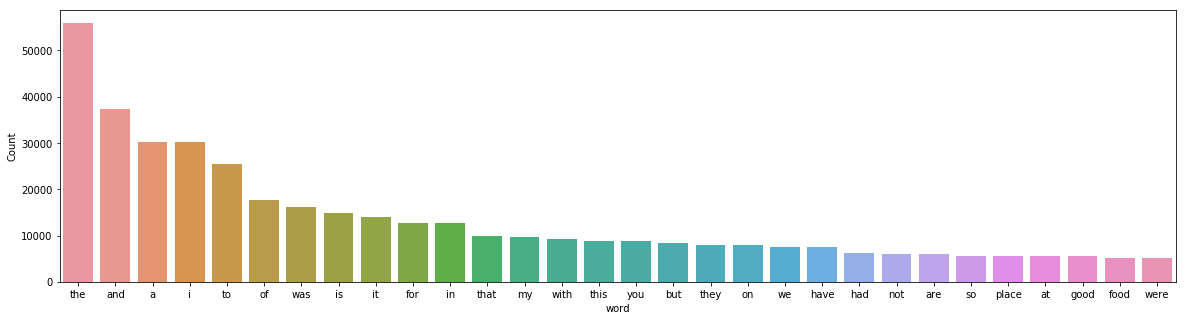

In [20]:
freq_words(df['text'])

In [21]:
nlp = spacy.load('en_core_web_sm')
nlp.vocab['however'].is_stop = False
nlp.vocab['no'].is_stop = False
nlp.vocab['not'].is_stop = False
nlp.vocab['but'].is_stop = False
nlp.vocab['ve'].is_stop = True
nlp.vocab['m'].is_stop = True

In [22]:
def strip_stopwords(reviews):
    s = []
    for r in tqdm(reviews):
        s_2 = []
        for token in r:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                s_2.append(token)
        s.append(" ".join(s_2))    
        
    return s

def tokenization(x):
    reviews_tokens = []
    for i in tqdm(x):
        i = nlp(i)
        temp = []
        for j in i:
            temp.append(j.text)
        reviews_tokens.append(temp)
    
    return reviews_tokens

In [23]:
df['text'] = tokenization(df['text'])

100%|██████████████████████████████████████████████████████████████████████████████| 8539/8539 [19:02<00:00,  7.47it/s]


In [24]:
df['text']=strip_stopwords(df['text'])

100%|████████████████████████████████████████████████████████████████████████████| 8539/8539 [00:08<00:00, 1020.06it/s]


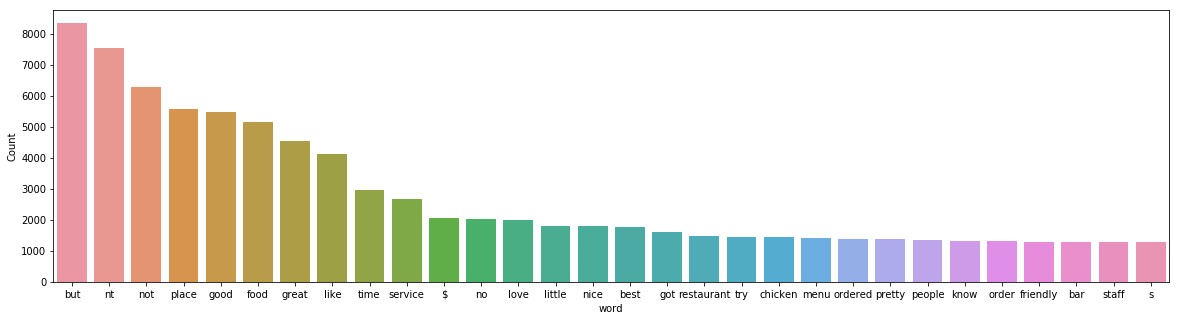

In [25]:
freq_words(df['text'])

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sentiment']=le.fit_transform(df['sentiments'])

In [27]:
df.groupby('stars').head()

,stars,text,sentiments,sentiment
0,5,wife took birthday breakfast excellent weath...,Good,1
1,5,no idea people bad reviews place goes probably...,Good,1
2,4,love gyro plate rice good dig candy selection,Good,1
3,5,rosie dakota love chaparral dog park convenien...,Good,1
4,5,general manager scott petello good egg not det...,Good,1
5,4,quiessence simply beautiful windows earthy w...,Good,1
6,5,drop drive ate day food good cute little g...,Good,1
7,4,luckily nt travel far connecting flight thank ...,Good,1
8,4,definitely come happy hour prices amazing sake...,Good,1
13,4,good tattoo shop clean space multiple artists ...,Good,1


In [28]:
data=df.values
X=df['text']
y=df['sentiment']
print(X.shape)
print(y.shape)

(8539,)
(8539,)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_dtm=vect.fit_transform(X)

In [30]:
X_dtm.shape

(8539, 29985)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_dtm,y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6404, 29985)
(2135, 29985)
(6404,)
(2135,)


## Model Selection

In choosing the model with the highest accuracy, the researcher compared the accuracy of 4 models, namely:
* Logistic Regression,
* Multinomial Naive Bayes
* Random Forest Classifier
* LinearSVC

C:\ProgramData\Anaconda3\envs\TensorDon\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


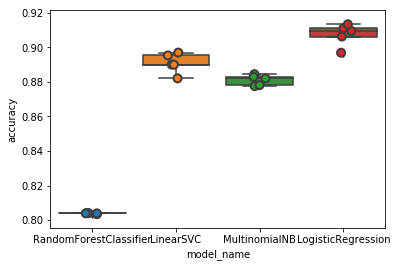

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [33]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.890849
LogisticRegression        0.907399
MultinomialNB             0.881012
RandomForestClassifier    0.803873
Name: accuracy, dtype: float64

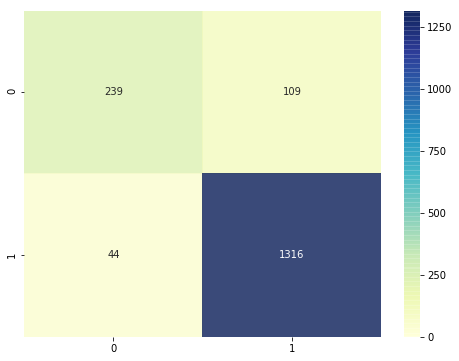

In [34]:
model = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X_dtm, y, df.index, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_pred):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)


plot_confusion_matrix(model, X_test, y_pred)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       348
           1       0.92      0.97      0.95      1360

   micro avg       0.91      0.91      0.91      1708
   macro avg       0.88      0.83      0.85      1708
weighted avg       0.91      0.91      0.91      1708



## Results of the experiment
The classification Model was tested with unseen data and it produced the following scores:
* Precision 91%
* Recall 91%
* F1 score 91%

## 7 Analysis of results
The reseacher achieved on this dataset better results than the established baseline by Pang et. al (2002) with 83% and a similar performance by Mullen et. al.(2004) with 86% One curious thing is if we look on the F-Score, in general, the capacity to predict positive is better than classify the negative examples. This can be because things like sarcasm, (where we want to say a negative thing instead of a positive), are more often used with a negative sentiment.

## 8 Discussion and Conclusion
The researcher built, tested and evaluated several machine learning methods for the Sentiment Analysis task. THe researcher learned a lot of things about how to face a machine learning problem and how to do data analysis to make the work easier to the machine to learn. One of the most important things when we are facing a text classification problem is the type of text and the words that we can see in the data. This is because it has an important impact on the number of words that the machine learning methods will learn and, in consequence, the final number of features. In this document, we can see that the effect of apply transformations on the data can improve the performance of the classification methods. In consequence, look the data, make a feature selection, apply transformations and filter the data that have less importance and information can make the machine learning method learn more efficiently and generalize better, because these days the machines have limitations and can’t handle all the data without any kind of prior process. In general, the machine learning methods tends to give similar results and, again, the results depend on the type of the data. A special mention to the Recurrent Neural Networks that the capacity to learn temporal dependences between words gives better results on all data that can be seen on this document

## References
Pang B, Lee L, and Vaithyanathan S., (2002)Thumbs up?: Sentiment classification using machine
learning techniques. *Proceedings of the ACL-02 Conference on Empirical Methods in Natural Language Processing* - Volume 10, EMNLP ’02, pages 79–86, Stroudsburg, PA, USA, 2002. Association for Computational Linguistics.

Mullen. T. and Collier N, (2004) Sentiment analysis using support vector machines with diverse information sources. *EMNLP*, volume 4, pages 412–418,